In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, probplot
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot

In [2]:
df1 = pd.read_csv('GWS.csv')
df2 = pd.read_csv('recharge_with_coord.csv')

In [6]:
# Reshape the dataframes
df1_values = df1.iloc[:, 2:].values.reshape(-1)
df2_values = df2.iloc[:, 2:].values.reshape(-1)
df1_values

array([ -99.14112888, -118.92378319, -110.99614819, ..., -721.79046211,
       -740.5768526 , -728.75928066])

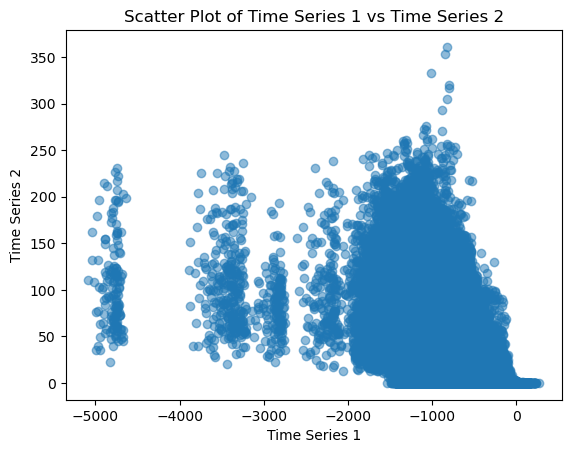

In [5]:
# Scatter plot
plt.scatter(df1_values, df2_values, alpha=0.5)
plt.xlabel('Time Series 1')
plt.ylabel('Time Series 2')
plt.title('Scatter Plot of Time Series 1 vs Time Series 2')
plt.show()

In [7]:
# Residual plot
linear_regression = LinearRegression()
linear_regression.fit(df1_values.reshape(-1, 1), df2_values.reshape(-1, 1))
predicted_values = linear_regression.predict(df1_values.reshape(-1, 1))
residuals = df2_values.reshape(-1, 1) - predicted_values

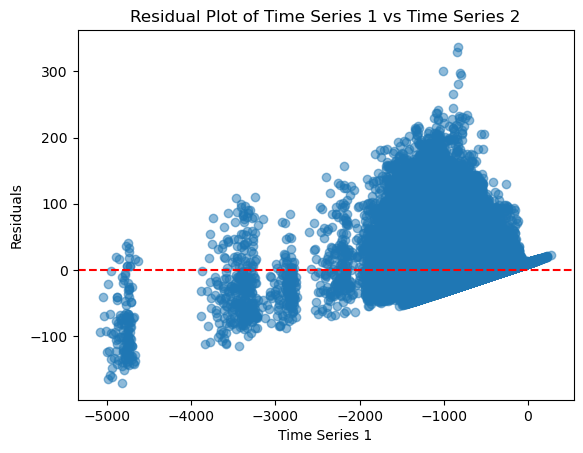

In [8]:
plt.scatter(df1_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Time Series 1')
plt.ylabel('Residuals')
plt.title('Residual Plot of Time Series 1 vs Time Series 2')
plt.show()

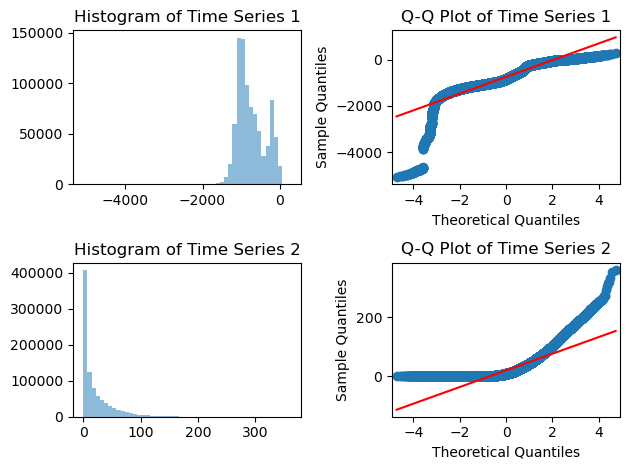

In [9]:
# Histograms and Q-Q plots for normality check
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df1_values, bins=50, alpha=0.5)
axs[0, 0].set_title('Histogram of Time Series 1')
axs[1, 0].hist(df2_values, bins=50, alpha=0.5)
axs[1, 0].set_title('Histogram of Time Series 2')
qqplot(df1_values, line='s', ax=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot of Time Series 1')
qqplot(df2_values, line='s', ax=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot of Time Series 2')
plt.tight_layout()
plt.show()

In [10]:
# Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df1_values, df2_values)
print(f'Pearson correlation coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

# Significance level
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson correlation coefficient: -0.5414914615646054
p-value: 0.0
The correlation is statistically significant.
